In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
# Importing the Libraries.
import keras
import os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
#import keras.backend as K
import tensorflow.keras.backend as K
import tensorflow.compat.v1 as tf
from os import listdir
from os.path import isfile, join
import numpy as np
import sys
import os
import shutil
import pandas as pd
from PIL import Image
import cv2
import keras
import glob
from PIL import Image
from keras.preprocessing.image import img_to_array
from sklearn.preprocessing import MultiLabelBinarizer
from keras import models, regularizers, layers, optimizers, losses, metrics
from keras.applications.resnet50 import ResNet50
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, MaxPool2D
from keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.layers import AveragePooling2D
from keras.models import load_model
from keras.layers.pooling import GlobalAveragePooling2D
from keras.layers.normalization import BatchNormalization
from keras.models import Model
from keras.optimizers import Adam, SGD
from keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from PIL import ImageFile

tf.enable_eager_execution()

In [ ]:
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [ ]:
# Data Augmentation.
DataGenerator = ImageDataGenerator(horizontal_flip=True, vertical_flip=True, rescale=1./255)

In [ ]:
TestGenerator = ImageDataGenerator(rescale=1./255)

In [ ]:
Grey_TrainingData = DataGenerator.flow_from_directory('/content/drive/My Drive/curetDataSet/Train/', target_size=(224,224), batch_size=8, color_mode='grayscale')

Found 12733 images belonging to 60 classes.


In [ ]:
Grey_ValidData = TestGenerator.flow_from_directory('/content/drive/My Drive/curetDataSet/Valid/', target_size=(224,224), batch_size=8, color_mode='grayscale')

Found 693 images belonging to 60 classes.


In [ ]:
gpu_options = tf.GPUOptions(allow_growth=True)
session = tf.InteractiveSession(config=tf.ConfigProto(gpu_options=gpu_options))

/usr/local/lib/python3.6/dist-packages/tensorflow/python/client/session.py:1751: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [ ]:
from keras.applications import ResNet50

In [ ]:
# Convoluted Base Model.
conv_base_grey = ResNet50(weights='imagenet', include_top=False)

94773248/94765736 [==============================] - 1s 0us/step


In [ ]:
# Make last block of the conv_base trainable:

for layer in conv_base_grey.layers[:165]:
   layer.trainable = False
for layer in conv_base_grey.layers[165:]:
   layer.trainable = True
for layer in conv_base_grey.layers:
  if isinstance(layer, BatchNormalization):
    layer.trainable = True

In [ ]:
model_grey = Sequential()

In [ ]:
from keras.layers import Input 

In [ ]:
input_tensor = Input(shape=(224,224,1))
x = Conv2D(3,(3,3), padding='same')(input_tensor)
out = conv_base_grey(x)

In [ ]:
models = Model(inputs = input_tensor, outputs = out)

In [ ]:
model_grey.add(models)

In [ ]:
# Adding layers.
model_grey.add(Flatten())
model_grey.add(Dense(2048, activation='relu', kernel_regularizer= regularizers.l2(0.001)))
model_grey.add(Dropout(0.5))
model_grey.add(Dense(60, activation='softmax'))

In [ ]:
from keras.optimizers import Adam

In [ ]:
model_grey.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.001),
              metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
checkpoint = ModelCheckpoint("/content/drive/My Drive/curetDataSet/Curnet_GreyScale_SGDResnet50.h5",
                             monitor="val_loss",
                             mode="min",
                             save_best_only = True,
                             verbose=1)

earlystop = EarlyStopping(monitor = 'val_loss', 
                          min_delta = 0, 
                          patience = 50,
                          verbose = 1,
                          restore_best_weights = True)

reduce_lr = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 50,
                              verbose = 1,
                              min_delta = 0.00001)

callBacks = [earlystop, checkpoint, reduce_lr]

In [ ]:
hist = model_grey.fit_generator(steps_per_epoch=1592,generator= Grey_TrainingData, validation_data= Grey_ValidData, validation_steps=87,epochs=35,callbacks=callBacks)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/35
1592/1592 [==============================] - ETA: 0s - loss: 5.9146 - accuracy: 0.5437
Epoch 00001: val_loss improved from inf to 5.00683, saving model to /content/drive/My Drive/curetDataSet/Curnet_GreyScale_SGDResnet50.h5
1592/1592 [==============================] - 3956s 2s/step - loss: 5.9146 - accuracy: 0.5437 - val_loss: 5.0068 - val_accuracy: 0.6898
Epoch 2/35
1592/1592 [==============================] - ETA: 0s - loss: 4.6675 - accuracy: 0.8065
Epoch 00002: val_loss improved from 5.00683 to 4.27422, saving model to /content/drive/My Drive/curetDataSet/Curnet_GreyScale_SGDResnet50.h5
1592/1592 [==============================] - 311s 195ms/step - loss: 4.6675 - accuracy: 0.8065 - val_loss: 4.2742 - val_accuracy: 0.9134
Epoch 3/35
1592/1592 [==============================] - ETA: 0s - loss: 4.4166 - accuracy: 0.8704
Epoch 00003: val_loss improved from 4.27422 to 4.16827, saving model to /content

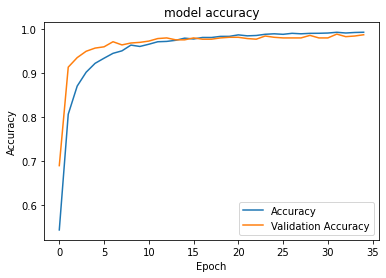

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hist.history["accuracy"])
plt.plot(hist.history['val_accuracy'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy"])
plt.show()

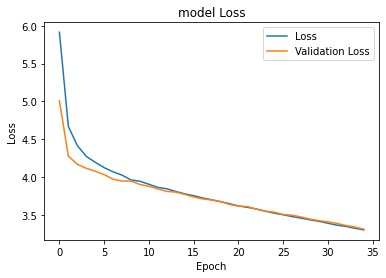

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Loss","Validation Loss"])
plt.show()

In [ ]:
GreyTestData = TestGenerator.flow_from_directory('/content/drive/My Drive/curetDataSet/Test/', target_size=(224,224), batch_size = 8, shuffle = False, color_mode='grayscale')

Found 750 images belonging to 60 classes.


In [ ]:
Grey_predict = model_grey.predict(GreyTestData)

In [ ]:
Grey_predict_classes = np.argmax(Grey_predict, axis=1)

In [ ]:
Grey_predict_classes

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        3,  3,  3, 13,  5,  3,  3,  3,  3,  3, 13,  4,  4,  4,  4,  4,  4,
        4,  1,  4,  4,  4,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5, 42,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  7,  7,  7,  7,  7,  7,  7,
        7,  7,  7, 45,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  9,  9,
        9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10, 10, 10, 10, 10, 10, 45,
       45, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11,  5, 12, 12, 12,
       12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13,
       13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       16, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18,
       18, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19,
       20, 20, 20, 20, 20

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score

In [ ]:
Grey_accuracy = accuracy_score(GreyTestData.classes, Grey_predict_classes)
print("Grey Accuracy: ", Grey_accuracy)

Grey Accuracy:  0.9786666666666667


In [ ]:
Grey_precision = precision_score(GreyTestData.classes, Grey_predict_classes,average="weighted")
print("Grey Precision: ", Grey_precision)

Grey Precision:  0.9811923680184549


In [ ]:
Grey_recall = recall_score(GreyTestData.classes, Grey_predict_classes, average="weighted")
print("Grey Recall:", Grey_recall)

Grey Recall: 0.9786666666666667


In [ ]:
Grey_f1_score = f1_score(GreyTestData.classes, Grey_predict_classes, average="weighted")
print("F1 score for Grey: ", Grey_f1_score)

F1 score for Grey:  0.9786111403723321


In [ ]:
Colour_TrainingData =  DataGenerator.flow_from_directory('/content/drive/My Drive/curetDataSet/Train/', target_size=(224,224), batch_size=8)

Found 12733 images belonging to 60 classes.


In [ ]:
Colour_ValidData =  DataGenerator.flow_from_directory('/content/drive/My Drive/curetDataSet/Valid/', target_size=(224,224), batch_size=8)

Found 693 images belonging to 60 classes.


In [ ]:
# Convoluted Base Model.
conv_base = ResNet50(weights='imagenet', include_top=False, input_shape=(224,224,3))

In [ ]:
# Make last block of the conv_base trainable:

for layer in conv_base.layers[:165]:
   layer.trainable = False
for layer in conv_base.layers[165:]:
   layer.trainable = True
for layer in conv_base.layers:
  if isinstance(layer, BatchNormalization):
    layer.trainable = True


In [ ]:
model = Sequential()

In [ ]:
model.add(conv_base)

In [ ]:
# Adding layers.
model.add(Flatten())
model.add(Dense(2048, activation='relu', kernel_regularizer= regularizers.l2(0.001)))
model.add(Dropout(0.5))
model.add(Dense(60, activation='softmax'))

In [ ]:
from keras.optimizers import SGD

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.001),
              metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
checkpoint = ModelCheckpoint("/content/drive/My Drive/curetDataSet/Curnet_Resnet50_SGDColour.h5",
                             monitor="val_loss",
                             mode="min",
                             save_best_only = True,
                             verbose=1)

earlystop = EarlyStopping(monitor = 'val_loss', 
                          min_delta = 0, 
                          patience = 50,
                          verbose = 1,
                          restore_best_weights = True)

reduce_lr = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 50,
                              verbose = 1,
                              min_delta = 0.00001)

callBacks = [earlystop, checkpoint, reduce_lr]

In [ ]:
hist = model.fit_generator(steps_per_epoch=1592,generator= Colour_TrainingData, validation_data= Colour_ValidData, validation_steps=87,epochs=35,callbacks=callBacks)

Epoch 1/35
1592/1592 [==============================] - ETA: 0s - loss: 5.4927 - accuracy: 0.6442
Epoch 00001: val_loss improved from inf to 4.26700, saving model to /content/drive/My Drive/curetDataSet/Curnet_Resnet50_SGDColour.h5
1592/1592 [==============================] - 336s 211ms/step - loss: 5.4927 - accuracy: 0.6442 - val_loss: 4.2670 - val_accuracy: 0.9235
Epoch 2/35
1592/1592 [==============================] - ETA: 0s - loss: 4.4474 - accuracy: 0.8663
Epoch 00002: val_loss improved from 4.26700 to 4.15301, saving model to /content/drive/My Drive/curetDataSet/Curnet_Resnet50_SGDColour.h5
1592/1592 [==============================] - 329s 207ms/step - loss: 4.4474 - accuracy: 0.8663 - val_loss: 4.1530 - val_accuracy: 0.9567
Epoch 3/35
1592/1592 [==============================] - ETA: 0s - loss: 4.2830 - accuracy: 0.9076
Epoch 00003: val_loss improved from 4.15301 to 4.06723, saving model to /content/drive/My Drive/curetDataSet/Curnet_Resnet50_SGDColour.h5
1592/1592 [===========

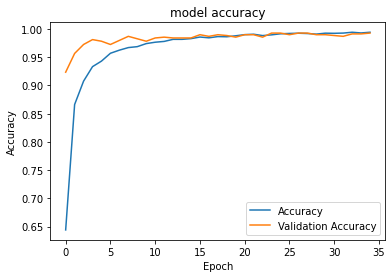

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hist.history["accuracy"])
plt.plot(hist.history['val_accuracy'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy"])
plt.show()

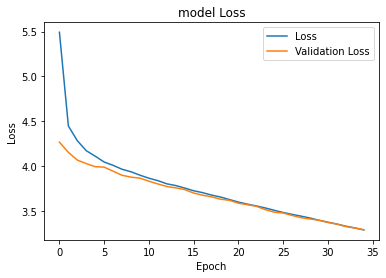

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Loss","Validation Loss"])
plt.show()

In [ ]:
Colour_TestData = TestGenerator.flow_from_directory('/content/drive/My Drive/curetDataSet/Test/', target_size=(224,224), batch_size = 8, shuffle = False)

Found 750 images belonging to 60 classes.


In [ ]:
Colour_predict = model.predict(Colour_TestData)

In [ ]:
Colour_predict_classes = np.argmax(Colour_predict, axis=1)

In [ ]:
Colour_predict_classes

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  4,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  7,  7,  7,  7,  7,  7,  7,
        7,  7,  7,  7,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  9,  9,
        9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12,
       12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13,
       13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       16, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18,
       18, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19,
       20, 20, 20, 20, 20

In [ ]:
Colour_accuracy = accuracy_score(Colour_TestData.classes, Colour_predict_classes)
print("Colour Accuracy: ", Colour_accuracy)

Colour Accuracy:  0.9906666666666667


In [ ]:
Colour_precision = precision_score(Colour_TestData.classes, Colour_predict_classes,average="weighted")
print("Colour Precision: ", Colour_precision)

Colour Precision:  0.9917700077700077


In [ ]:
Colour_recall = recall_score(Colour_TestData.classes, Colour_predict_classes, average="weighted")
print("Colour Recall:", Colour_recall)

Colour Recall: 0.9906666666666667


In [ ]:
Colour_f1_score = f1_score(Colour_TestData.classes, Colour_predict_classes, average="weighted")
print("F1 score for colour: ", Colour_f1_score)

F1 score for colour:  0.9907552133475979


In [ ]:
model_grey.load_weights('/content/drive/My Drive/curetDataSet/Curnet_GreyScale_Resnet50.h5')

In [ ]:
Final = 0.6* Colour_predict + 0.4* Grey_predict

In [ ]:
Final_Predict_classes = np.argmax(Final, axis=1)

In [ ]:
Final_accuracy = accuracy_score(Colour_TestData.classes, Final_Predict_classes)
print("Colour Accuracy: ", Final_accuracy)

Colour Accuracy:  0.992


In [ ]:
Final_precision = precision_score(Colour_TestData.classes, Final_Predict_classes,average="weighted")
print("Colour Precision: ", Final_precision)

Colour Precision:  0.9925555555555555


In [ ]:
Final_recall = recall_score(Colour_TestData.classes, Final_Predict_classes, average="weighted")
print("Colour Recall:", Final_recall)

Colour Recall: 0.992


In [ ]:
Final_f1_score = f1_score(Colour_TestData.classes, Final_Predict_classes, average="weighted")
print("F1 score for colour: ", Final_f1_score)

F1 score for colour:  0.9920199296402902


In [ ]:
Second_final = 0.5* Colour_predict + 0.5* Grey_predict

In [ ]:
Second_Final_Predict_classes = np.argmax(Second_final, axis=1)

In [ ]:
Mean_Final_accuracy = accuracy_score(Colour_TestData.classes, Second_Final_Predict_classes)
print("Colour Accuracy: ", Mean_Final_accuracy)

Colour Accuracy:  0.9933333333333333


In [ ]:
Mean_Precision = precision_score(Colour_TestData.classes, Second_Final_Predict_classes, average="weighted")
Mean_Precision

0.9937777777777776

In [ ]:
Mean_Recall = recall_score(Colour_TestData.classes, Second_Final_Predict_classes, average="weighted")
Mean_Recall

0.9933333333333333

In [ ]:
Mean_F1Score = f1_score(Colour_TestData.classes, Second_Final_Predict_classes, average="weighted")
Mean_F1Score

0.9933405376289788

In [ ]:
model_grey.load_weights('/content/drive/My Drive/curetDataSet/Curnet_GreyScale_Resnet50.h5')

In [ ]:
model.load_weights('/content/drive/My Drive/curetDataSet/Curnet_Resnet50_Colour.h5')

In [ ]:
Final = 0.8 * Colour_predict + 0.2 * Grey_predict

In [ ]:
Final_classes = np.argmax(Final, axis=1)

In [ ]:
Combine_accuracy = accuracy_score(Colour_TestData.classes, Final_classes)
print("Colour Accuracy: ", Combine_accuracy)

Colour Accuracy:  0.9773333333333334
